In [15]:
## ERP

In [4]:
pwd

'/home/benny/Desktop/Github/Oscillations analysis'

In [5]:
lista = [r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_001.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_002.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_003.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_004.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_005.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_006.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_007.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_008.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_009.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_010.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_011.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_012.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_013.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_014.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_015.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_016.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_017.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_018.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_019.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_020.bin"]

timeseries =[]
for k in range(20):
    path = lista[k]
    width = 4    #columns
    heigth = 64   #rows
    nframes = 2000  #load  only some frames
    #n_words_to_load = heigth * width  * nframes
    n_words_to_load = -1  #load  all frames 
    raw = np.fromfile( path, dtype=np.double, count = n_words_to_load)  # count = -1 to load all data
    a = np.reshape(raw, (-1, width, heigth))
    a1 = []
    
    for z in range(9764):
        a1.append(np.delete(a[z],(0,1,2,3,4,5,6,7,8), axis = 1).transpose().tolist())
   
    a1 = np.asarray(a1)
    a1 = a1.reshape(-1,220)
    timeseries.append(a1)
    
                      
timeseries = np.array(timeseries)
timeseries[:,:,60] = np.mean(timeseries, axis = 2)

(0.0, 1000.0)

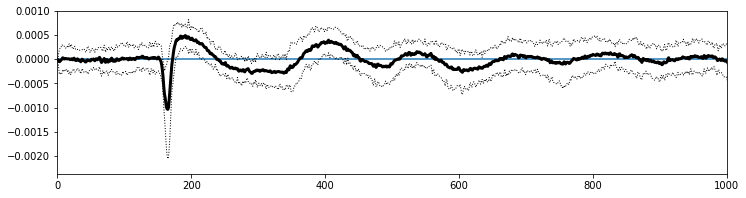

In [6]:
import numpy as np
j= np.mean(timeseries[:,:,115],0)
std = timeseries[:,:,115].std(0)
t = np.arange(0,len(j),1)
fig, ax = plt.subplots(figsize=(12, 3))    # Save the axes for use in later cells and resize the figure
ax.plot(t, j, 'k', lw=3)              # Plot the ERP of condition A
ax.plot(t, j + 2 * std, 'k:', lw=1)  # ... and include the upper CI
ax.plot(t, j - 2 * std, 'k:', lw=1)
ax.hlines(0, t[0], t[-1])

plt.xlim(0,1000)
#plt.plot(timeseries[0,:,80])

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
def bootstrapERP(EEGdata, size=None):  # Steps 1-2
    """ Calculate bootstrap ERP from data (array type)"""
    ntrials = len(EEGdata)             # Get the number of trials
    if size == None:                   # Unless the size is specified,
        size = ntrials                 # ... choose ntrials
    i = randint(ntrials, size=size)    # ... draw random trials,
    EEG0 = EEGdata[i]                  # ... create resampled EEG,
    return EEG0.mean(0)
# ... return resampled ERP.
trials = timeseries[:,:1000,175]                # Step 3: Repeat 3000 times 
ERP0 = [bootstrapERP(trials) for _ in range(3000)]
ERP0 = array(ERP0) 

In [8]:
# Create a function to label plots
def labelPlot(title_string="Title"):
    '''
    A function that labels the x-axis as 'Time [s]' and
    the y-axis as 'Voltage [$\mu V$]'. 
    Arguments:
        title_string:  string variable to be used as
                       the plot title (default: 'Title')
                       
    '''
    xlabel('Time [s]')           # x-axis is time
    ylabel('Voltage [$/mu V$]')  # y-axis is voltage
    title(title_string)          # use the input here
    autoscale(tight=True)        # no white-space in plot

In [419]:
mnA.shape

(1000,)

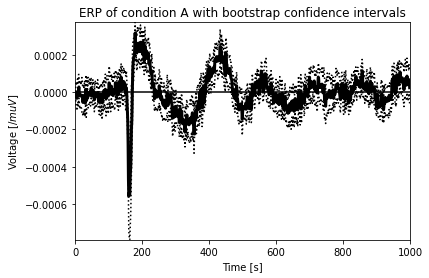

In [9]:
ERP0.sort(axis=0)
t = np.arange(0,1000,1)# Sort each column of the resampled ERP
N = len(ERP0)             # Define the number of samples
ciL = ERP0[int(0.025*N)]  # Determine the lower CI
ciU = ERP0[int(0.975*N)]  # ... and the upper CI
mnA = trials.mean(0)        # Determine the ERP for condition A
plot(t, mnA, 'k', lw=3)   # ... and plot it
plot(t, ciL, 'k:')        # ... and plot the lower CI
plot(t, ciU, 'k:')        # ... and the upper CI
hlines(0, 0, 1000, 'k')      # plot a horizontal line at 0
                          # ... and label the axes
labelPlot('ERP of condition A with bootstrap confidence intervals')  # We define this function above!

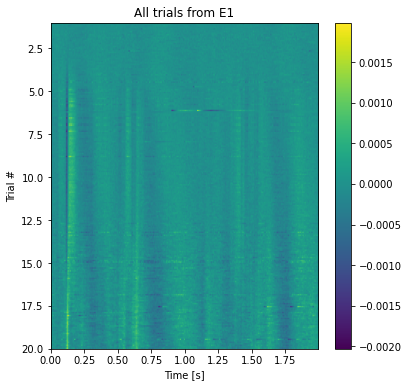

In [10]:
K = timeseries.shape[0]
v1 = timeseries[10,2000:4000,:].T
#print(v1.shape)
t = np.arange(0,len(v1[0]),1)*0.001

f, a = subplots(figsize=(6, 6))            # Make a square axis
plt.imshow(v1,                               #... and show the image,
           extent=[min(t), max(t), K, 1],  # ... with meaningful axes,
           aspect='auto')
plt.colorbar()
xlabel('Time [s]')
ylabel('Trial #');
title('All trials from E1')
show()

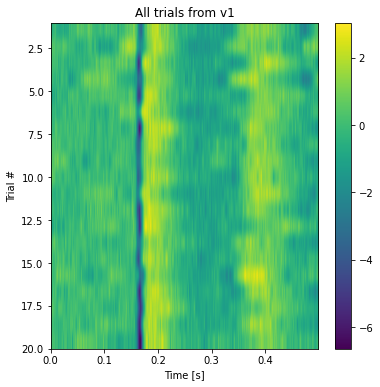

In [11]:
K = timeseries.shape[0]
v1 = timeseries[:,:500,90]/np.std(timeseries[0,:500,90])
t = np.arange(0,len(v1[0]),1)*0.001
f, a = subplots(figsize=(6, 6))            # Make a square axis
plt.imshow(v1,                               #... and show the image,
           extent=[min(t), max(t), K, 1],  # ... with meaningful axes,
           aspect='auto')
plt.colorbar()
xlabel('Time [s]')
ylabel('Trial #');
title('All trials from v1')
show()

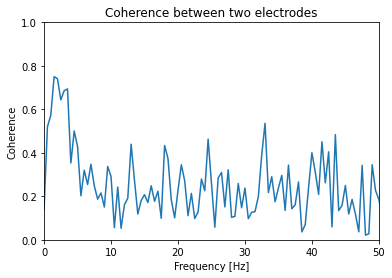

In [12]:
E1 = timeseries[:,4000:6000,80]                              # ... from the first electrode,
E2 = timeseries[:,4000:6000,210]                              # ... and from the second electrode.
t = np.arange(0,len(E1[0]),1)*0.001         # Load the time axis,
dt = t[1] - t[0]                             # ... to get the sampling interval,
T = t[-1]                                    # ... and the total time of the recording.
N = E1.shape[1]                              # Determine the number of sample points per trial
scale = 2 * dt**2 / T                        # Scaling constant

# Compute the Fourier transforms
xf = array([rfft(x - x.mean()) for x in E1]) # ... for each trial in E1
yf = array([rfft(y - y.mean()) for y in E2]) # ... and each trial in E2

# Compute the spectra
Sxx = scale * (xf * xf.conj()).mean(0)       # Spectrum of E1 trials
Syy = scale * (yf * yf.conj()).mean(0)       # ... and E2 trials
Sxy = scale * (xf * yf.conj()).mean(0)       # ... and the cross spectrum

# Compute the coherence.
cohr = abs(Sxy) / (sqrt(Sxx) * sqrt(Syy))

f = rfftfreq(N, dt)                          # Define a frequency axis.
plot(f, cohr.real)                           # Plot coherence vs frequency,
xlim([0, 50])                                # ... in a chosen frequency range,
ylim([0, 1])                                 # ... with y-axis scaled,
xlabel('Frequency [Hz]')                     # ... and with axes labeled.
ylabel('Coherence')
title('Coherence between two electrodes')
#plt.xlim(0,20)
show()

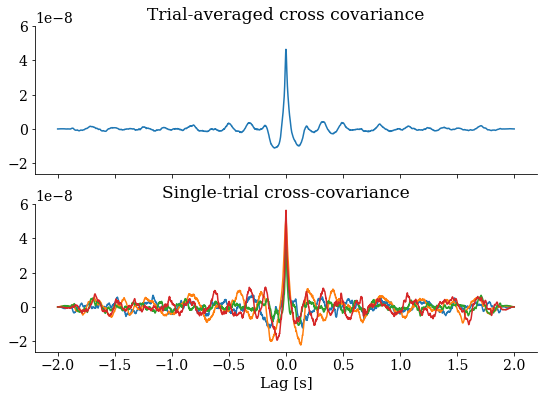

In [90]:
E1 = timeseries[:,2000:4000,80]
E2 = timeseries[:,2000:4000,90]
N = len(E1[0])
#x = E1[0,:] - mean(E1[0,:])  # Define one time series,
#y = E2[0,:] - mean(E2[0,:]) 
# ... and another.
#xc=1/N*correlate(x,y,2)      # ... and compute their cross covariance.
#lags = arange(-N+1,N)        # Create a lag axis,
#plot(lags*dt,xc)             # ... and plot the cross covariance vs lags in time.

#xlim([-0.2,0.2])            # In a nice range, with axes labelled.
#xlabel('Lag [s]')
#ylabel('Cross covariance');
#title('Cross covariance between two electrodes during the first trial')
#savefig('imgs/xc_1')


#print(len(xc))
#plt.figure()
N = len(E1[0])
lags = arange(-N+1,N)

XC = zeros([K, 2 * N - 1]) 
#print(XC.shape)# Declare empty vector for cross cov.
for k in range(K):            # For each trial,
    x = E1[k] - E1[k].mean()  # ...get data from one electrode,
    y = E2[k] - E2[k].mean()  # ...and the other electrode,
    XC[k] = 1 / N * correlate(x, y, 'full')  # ...compute cross covariance.

f, (a1, a2) = subplots(2, 1, figsize=(9, 6), sharex=True, sharey=True)    
a1.plot(lags * dt, XC.mean(0))                 # Plot cross covariance vs lags in time.
[a2.plot(lags * dt, XC[k]) for k in range(4)]  # Also, plot the single-trial cross-covariance for 4 trials

#xlim([-0.2, 0.2])             # In a nice range, with axes labelled.
#ylim([-0.6, 0.6])
xlabel('Lag [s]')
a1.set_title('Trial-averaged cross covariance')
a2.set_title('Single-trial cross-covariance')
#savefig('imgs/avg_xc')
show()

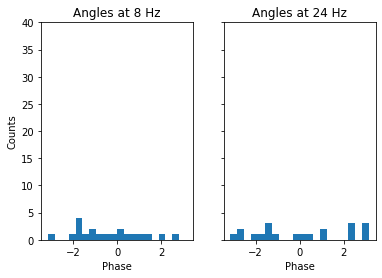

In [13]:
j8 = 20
#where(f==10)[0][0]       # Determine index j for frequency 8 Hz.
j24 = 40
#where(f==24)[0][0]     # Determine index j for frequency 24 Hz.
K = 20
phi8 = zeros(K)              # Variables to hold phase differences.
phi24 = zeros(K)

for k in range(K):           # For each trial, compute the cross spectrum. 
    x = E1[k] - mean(E1[k])  # Get the data from each electrode,
    y = E2[k] - mean(E2[k,:])
    xf = rfft(x - mean(x))   # ... compute the Fourier transform,
    yf = rfft(y - mean(y))
    Sxy = 2 * dt**2 / T * (xf * conj(yf))  # ... and the cross-spectrum,
    phi8[k] = angle(Sxy[j8]) # ... and the phases.
    phi24[k] = angle(Sxy[j24])
                             # Plot the distributions of phases.
_, (a1, a2) = subplots(1, 2, sharey=True, sharex=True)
a1.hist(phi8, bins=20, range=[-pi, pi])
a2.hist(phi24, bins=20, range=[-pi, pi])

ylim([0, 40])                # Set y-axis and label axes.
a1.set_ylabel('Counts')
a1.set_xlabel('Phase');
a1.set_title('Angles at 8 Hz')

a2.set_title('Angles at 24 Hz')
a2.set_xlabel('Phase');

In [4]:
import numpy as np
import matplotlib.pyplot as plt

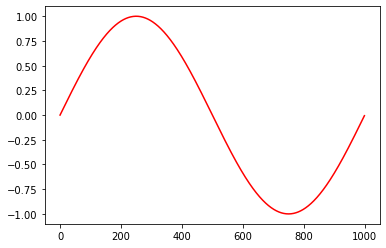

In [7]:
plt.plot(np.sin(2*np.pi*np.arange(0,1,0.001)), 'r-')

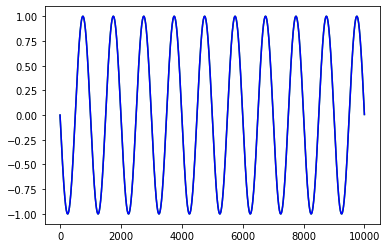

In [15]:
#plt.plot(np.sin(2*np.pi*np.arange(0,10,0.001)), 'r-')
plt.plot(, 'g-')
plt.plot(np.sin(2*np.pi*np.arange(0,10,0.001)-np.pi), 'b-')

In [38]:
sig1 = np.sin(2*np.pi*np.arange(0,10,0.001))
sig2 = np.sin(2*np.pi*np.arange(0,10,0.001)+np.pi/2)
from scipy import signal

In [39]:
hil1 =signal.hilbert(sig1)
hil2 = signal.hilbert(sig2)

(0.0, 1000.0)

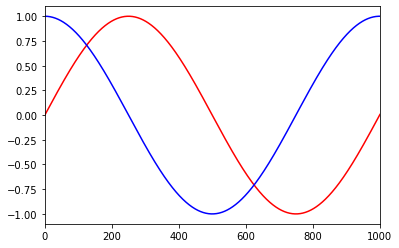

In [40]:
plt.plot(sig1, 'r-')
plt.plot(sig2, 'b-')
plt.xlim(0,1000)

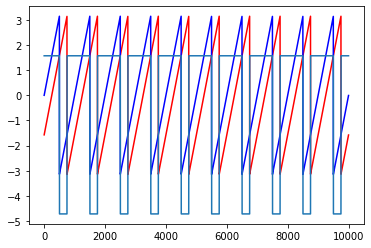

In [42]:
plt.plot(np.angle(hil1), 'r-')
plt.plot(np.angle(hil2), 'b-')
plt.plot(np.angle(hil2)-np.angle(hil1))
#plt.xlim(0,1000)

In [29]:
np.angle(hil2),np.angle(hil1)

(array([-1.57079633, -1.56451314, -1.55822996, ..., -1.58964588,
        -1.5833627 , -1.57707951]),
 array([-1.57079633, -1.56451314, -1.55822996, ..., -1.58964588,
        -1.5833627 , -1.57707951]))